Christopher Jason Pierre-Samuel

School of Physics and Astronomy, Queen Mary University of London
, Mile End Rd, Bethnal Green, London E1 4NS

## Introduction

Antiferromagnetism occues when the magnetic moments of atoms or molecules, align in a regular pattern  pointing in opposite directions. The following report will aim to analyse neutron diffraction data, collected at the Uk's national neutron source to determine numerical values for the parameters involved in antiferrmagnetism. Followed by, a discussion on how altering the data set alters the appearance of the results. And, summarizing the main points of the study.

## Methods

First, loadtxt is imported from numpy as load, as it will be used to read the data as an array at different temperatures, From pylab, plot, legend, xlabel, ylabel and title are imported to create a graph. The data for specific temperatures was loaded from a directory using load and assigned to a variable  with the name, data plus the temperature number. Next, utilizing the plot function the data was seperated into two list; d-spacing and difrraction intensity. Also each plot was given a distinct colour to identify them and lebel to specify the data set. 

Following on, trapz from numpy was imported as a function to integrate over the data sets to calculate the integrated magnetic diffraction intensity. Then plotted as a function of temperature.

Afterwards, two more functions were imported from numpy; where and array. They were used to define the magnetism function ($M(T)$)  below, as a function of temperature with parametrs; the amplitude $A$ of the magnetic signal, the magnetic transition temperature $T_0$, the critical exponent beta, and a constant background $B$. Linpace was also imorted to generate equally spaced coordinates from two to fifty to generate values for the newly defined function within the range. Then, it was plotted against the integrated magnetic diffraction graph with multiple guesses on the parameters to get the two graphs to fit.
$$
M(T) = \begin{cases}A(T_0 - T)^\beta + B & T < T_0 \\ B & T \geq T_0\end{cases}.
$$                                           

Finally, for the last graph the curve_fit function is imported from scipy.optimize. It was then unpacked into two seperate variables containing arrays of the calculated parameters and another array. The array containing the parameters was printed for the user to see and then plotted against the previous two functions. 


## Results

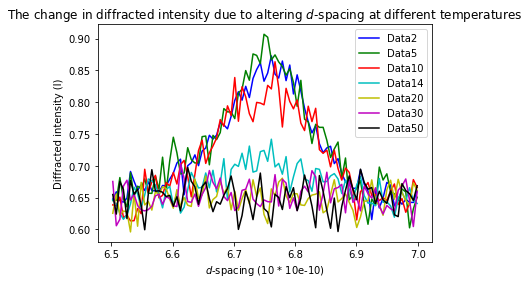

In [5]:
from numpy import loadtxt as load
from pylab import plot, legend, xlabel, ylabel, title


data2, data5, data10, data14, data20, data30, data50 = load("C:\\Users\\CPier\\ap16178\\project2_data\\data_02.0K.txt"), load("C:\\Users\\CPier\\ap16178\\project2_data\\data_05.0K.txt"), load("C:\\Users\\CPier\\ap16178\\project2_data\\data_10.0K.txt"), load("C:\\Users\\CPier\\ap16178\\project2_data\\data_14.0K.txt"), load("C:\\Users\\CPier\\ap16178\\project2_data\\data_20.0K.txt"), load("C:\\Users\\CPier\\ap16178\\project2_data\\data_30.0K.txt"), load("C:\\Users\\CPier\\ap16178\\project2_data\\data_50.0K.txt")
plot(data2[:,0], data2[:,1], 'b-', label ='Data2')
plot(data5[:,0], data5[:,1], 'g-', label ='Data5')
plot(data10[:,0], data10[:,1], 'r-', label ='Data10')
plot(data14[:,0], data14[:,1], 'c-', label ='Data14')
plot(data20[:,0], data20[:,1], 'y-', label ='Data20')
plot(data30[:,0], data30[:,1], 'm-', label ='Data30')
plot(data50[:,0], data50[:,1], 'k-', label ='Data50')
xlabel('$d$-spacing (10 * 10e-10)')
ylabel('Diffracted intensity (I)')
title('The change in diffracted intensity due to altering $d$-spacing at different temperatures')
legend()

$Figure$ $1:$
The graph above shows the unpacked data that had been seperated into seperate numpy arrays containing d-spacing and the diffracted intensity(I). Each plot is attached with a legend specifying which temperature dataset it belongs to.
As shown in the graph it can be infered that the transition temperature is around 20K looking at the sudden change.

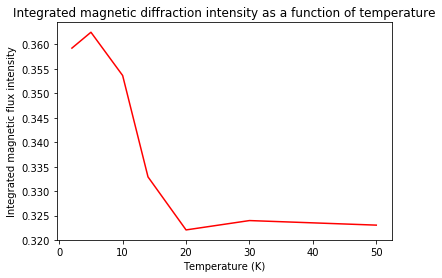

In [11]:
from numpy import trapz
x = [2, 5, 10, 14, 20, 30, 50]
y = [trapz(data2[:,1],data2[:,0]), trapz(data5[:,1],data5[:,0]), trapz(data10[:,1],data10[:,0]), trapz(data14[:,1],data14[:,0]), trapz(data20[:,1],data20[:,0]), trapz(data30[:,1],data30[:,0]), trapz(data50[:,1],data50[:,0])]
ylabel('Integrated magnetic flux intensity')
xlabel('Temperature (K)')
title('Integrated magnetic diffraction intensity as a function of temperature')
plot(x,y,'r')

$Figure$ $2:$
Figure 2 shows how the integrated magnetic flux intensity has a steep decline around 5K and stablized around 0.322 to 0.323 after reaching a temperature of 20K.  

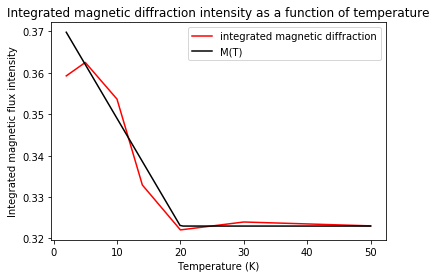

In [29]:
from numpy import where, array, linspace 
def M(T, T0, A, beta, B):
    return where(T < T0, (A*(T0 - T)**beta) + B, B)
T = linspace(2,50,100)
ylabel('Integrated magnetic flux intensity')
xlabel('Temperature (K)')
title('Integrated magnetic diffraction intensity as a function of temperature')
plot(x,y,'r', label = 'integrated magnetic diffraction')
plot(T, M(T ,20.0,.0026,1.0, .323),'k',label = 'M(T)')
legend()

$Figure$ $3:$
This figure shows figure 3 alongside the model for the magnetic signal as a function of temperature, with guesses used in the parameters.

[14.00591612  0.0246378   0.17809541  0.32303074]


C:\Users\CPier\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


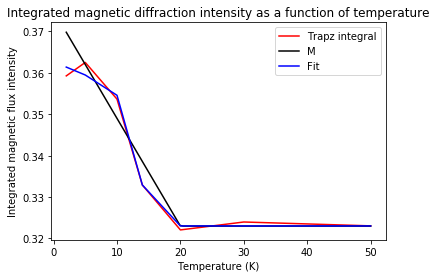

In [28]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def M(T, T0, A, beta, B):
    return where(T < T0, (A*(T0 - T)**beta) + B, B)
C = array([2,5,10,14,20,30,50])
p0 = [20.,.0026,1,.323]
k,l = curve_fit(M, C, y, p0)
print(k)
ylabel('Integrated magnetic flux intensity')
xlabel('Temperature (K)')
title('Integrated magnetic diffraction intensity as a function of temperature')
plot(x,y,'r', label = 'Trapz integral')
plot(T, M(T ,*p0), 'k', label = 'M')
plot(C, M(C,*k), 'b', label = 'Fit')
legend()

$Figure$ $4:$
The Fit graph is now added to figure 3 to illustrate how it produces a closer fit when compared to $M(T)$, and returns with new estimates for the parameters 

## Discussion

When making guesses observations had shown that the fit was very sensitive to initial guesses. An example of this could be seen when changing $\beta$ from 1 to 2 as it makes the $M(T)$ much larger than the trapeziod graph.

Moreover, if initial values in the data set were cut down then the parameters returned from the fit function would be very close their exact values. This may imply that the initial values of the data sets are outliers and skew the data.

## Conclusions

In conclusion, the functions used were very sensitive to the guess parameters applied and needed to have guesses close. This makes the method not very efficient for functions like the one given. But, they were able to a suitable fit. 

## References

1.)Docs.scipy.org. (2018). scipy.optimize.curve_fit — SciPy v1.2.1 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html [Accessed 28 Feb. 2019].

2.)Docs.scipy.org. (2018). numpy.trapz — NumPy v1.16 Manual. [online] Available at: https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html [Accessed 28 Feb. 2019].

3.)Qmplus.qmul.ac.uk. (2018). Magnetic transitions and isotropicversusanisotropicmagnetic behaviour of [CH3NH3][M(HCOO)3]M=Mn2+,Co2+,Ni2+,Cu2+metal–organicperovskites. [online] Available at: https://qmplus.qmul.ac.uk/pluginfile.php/1559690/mod_resource/content/2/Project2-ref1.pdf [Accessed 28 Feb. 2019].